<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/17_4_IMBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя знания данного урока, и набор данных IMDB вам необходимо:
1. Спроектировать модель классификации отзывов к фильмам с точностью на валидационной выборке более 90%.
2. Показать, что модель способна классифицировать отзывы с вероятностью более 88% на контрольной выборке.

За успешное выполнение задания вы получите 3 балла. Если сможете преодолеть точность 95% на валидационной выборке и/или 93% на контрольной, то получите 4 балла.

Также вы можете получить дополнительно 1 балл, если выполните все предложенные задания в задаче о Титанике (17.1), проанализируете "увеличенную модель" (17.2).

In [86]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras import regularizers
from sklearn import metrics

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [87]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Записываем единицы в элемент с данным индексом
    return results

x_train = vectorize_sequences(train_data) # Векторизуем обучающие данные
x_test  = vectorize_sequences(test_data)  # Векторизуем контрольные данные

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


In [92]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dropout(0.2))


model.add(layers.Dense(1, activation='sigmoid'))

EPOCHS =
BATCH_SIZE = 256
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/15
79/79 [==============================] - 3s 24ms/step - loss: 0.1684 - accuracy: 0.7607 - val_loss: 0.0917 - val_accuracy: 0.8832
Epoch 2/15
79/79 [==============================] - 1s 6ms/step - loss: 0.0827 - accuracy: 0.8969 - val_loss: 0.0798 - val_accuracy: 0.8948
Epoch 3/15
79/79 [==============================] - 1s 6ms/step - loss: 0.0591 - accuracy: 0.9282 - val_loss: 0.0787 - val_accuracy: 0.8960
Epoch 4/15
79/79 [==============================] - 1s 6ms/step - loss: 0.0458 - accuracy: 0.9445 - val_loss: 0.0802 - val_accuracy: 0.8958
Epoch 5/15
79/79 [==============================] - 1s 7ms/step - loss: 0.0366 - accuracy: 0.9574 - val_loss: 0.0819 - val_accuracy: 0.8930
Epoch 6/15
79/79 [==============================] - 1s 6ms/step - loss: 0.0318 - accuracy: 0.9628 - val_loss: 0.0836 - val_accuracy: 0.8940
Epoch 7/15
79/79 [==============================] - 1s 7ms/step - loss: 0.0258 - accuracy: 0.9711 - val_loss: 0.0852 - val_accuracy: 0.8916
Epoch 8/15
79/79 [=

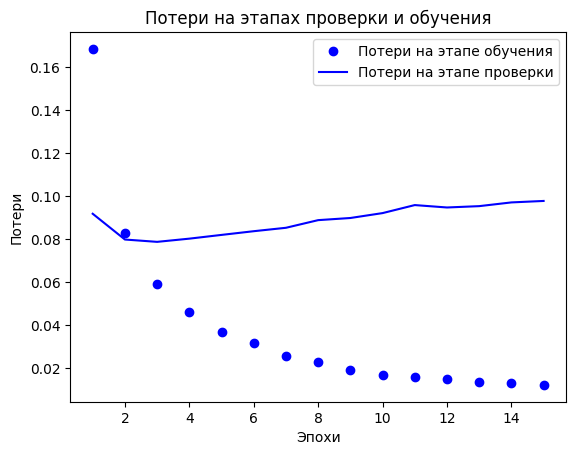

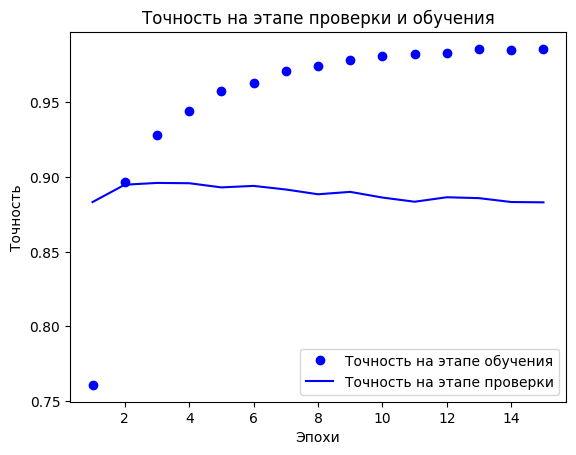


782/782 [==============================] - 1s 2ms/step - loss: 0.1076 - accuracy: 0.8732
Точность на этапе обучения = 98.6 %
Точность на этапе проверки = 88.3 %
Точность на тестовых данных = 87.3 %


In [93]:
history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

plt.clf() # Очистить рисунок
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Точность на этапе обучения')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Точность на этапе проверки')
plt.title('Точность на этапе проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()
print()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Точность на этапе обучения = {round((history_dict['accuracy'][-1]*100), 1)} %")
print(f"Точность на этапе проверки = {round((history_dict['val_accuracy'][-1]*100), 1)} %")
print (f"Точность на тестовых данных = {round((test_accuracy*100), 1)} %")